# 1. Install 라이브러리

In [1]:
!pip3 install pandas

Defaulting to user installation because normal site-packages is not writeable


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# 2. Import 라이브러리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# 3. 함수 및 경로 설정

### 3.1. 함수

In [3]:
def reading_file(file_path):
    """
    CSV 파일 리딩 -> DataFrame으로 변환

    Parameters:
    - value: 날짜를 나타내는 String변수
    
    Returns:
    - 변환된 String 날찌 변수 (YYYY-MM 형식)
    """

    # 시도할 인코딩 목록
    encodings = ['utf-8', 'cp949', 'ISO-8859-1', 'cp1252']  
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            return df  # 데이터프레임 반환 또는 데이터프레임 처리
        except Exception as e:
            pass
    return None

def convert_date(date_str):
    # 한국식 스타일로 변환
    dd, mm, yyyy = date_str.split('-')
    return f'{yyyy}-{mm}-{dd}'

def conver_date_int(date_int):
    d = f'{date_int}'
    return f'{d[:4:]}-{d[4:6:]}-{d[6::]}'


### 3.2. 경로

In [4]:
PATH_SONNY_STATS = 'data_csv/data_sonny.csv'
PATH_POST_DATA = 'data_json/post.json'
PATH_POST_DATA_CSV = 'data_csv/post.csv'
PATH_DAILY_EMOTION = 'data_json/daily_emotion.json'

# 3. 데이터 수집

### 3.1. 손흥민 선수 매치 기록

In [5]:
df_stats = reading_file(PATH_SONNY_STATS)
match_days = {convert_date(day) for day in df_stats['Date']}
df_stats

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
0,Fulham (A)3-0,16-03-2024,FW,87,-,-,-,-,2,90.6,-,6.49
1,Aston Villa (A)0-4,10-03-2024,FW,90,1,2,-,-,2,86.0,-,9.35
2,Crystal Palace (H)3-1,02-03-2024,FW,90,1,-,-,-,5,73.9,-,8.34
3,Wolves (H)1-2,17-02-2024,AML,90,-,-,-,-,-,81.3,-,6.04
4,Brighton (H)2-1,10-02-2024,Sub,28,-,1,-,-,-,91.7,-,6.77
5,Bournemouth (H)3-1,31-12-2023,AML,90,1,-,-,-,2,97.1,-,8.16
6,Brighton (A)4-2,28-12-2023,AML,90,-,1,-,-,5,81.3,-,6.80
7,Everton (H)2-1,23-12-2023,AML,90,1,-,-,-,2,70.6,-,7.57
8,Nottingham Forest (A)0-2,15-12-2023,AML,88,-,-,1,-,4,83.3,-,7.02
9,Newcastle (H)4-1,10-12-2023,AML,90,1,2,-,-,4,80.6,-,9.50


### 3.2. 해외축구갤러리 게시글 수집

In [6]:
df_emotions = reading_file(PATH_POST_DATA_CSV)
df_emotions

,DATE,CONTENT
0,20240320,뭐야 내가 글을 잘못 쓴거야?댓글이 병신인거야?
1,20240320,해붕이 요즘 피부상태가 안좋다....
2,20240320,애미창민 은퇴하면 피엘 보지도 않고 조트넘만 보는 손뽕들이
3,20240320,아직도 대가리 안깨진 새끼들은 뭐 ㄹㅇ 앰생이거나 조선족 알바겠지
4,20240320,핑크 ㅂㅈ 유니폼
...,...,...
49890,20221224,[구토멸망] 인성가지고 신두형 뭐라고 못함ㅋㅋ
49891,20221224,우유가 뿜어져나오는 협곡
49892,20221224,결국 호날두 역대 선수 8위 선정
49893,20221224,카카정도면 레전드냐?


### 3.3. 일별 감정 분석 데이터 수집

In [7]:
import json
with open(PATH_DAILY_EMOTION, 'r') as f:
    json_emotions = json.load(f)

daily_emotions = {}
for id in list(json_emotions.keys()):
    i, data = int(id), json_emotions[id]
    emotion, negs = data
    date = conver_date_int(df_emotions['DATE'][i])
    content = df_emotions['CONTENT'][i]

    if date in daily_emotions:
        daily_emotions[date]['EMOTION'] += emotion
        daily_emotions[date]['Count'] += 1
        daily_emotions[date]['Negative'] += negs
    else:
        daily_emotions[date] = {'EMOTION': emotion, 'Count': 1, 'Negative': negs}

day_list = list(daily_emotions.keys())
day_list.sort()

csv_box = [['DATE', 'Emotion', 'Count', 'Negative']]
for date in daily_emotions:
    emotion_sum = daily_emotions[date]['EMOTION']
    count = daily_emotions[date]['Count']
    negs = daily_emotions[date]['Negative']    
    count *= 100
    
    emotion = ((emotion_sum/count) - 50) * count
    emotion = emotion_sum/count
    csv_box.append([date, emotion, count, negs])

# df2 = pd.DataFrame(csv_box, )# .sort_values(by='DATE')
df_emotion = pd.DataFrame(csv_box[1::], columns=csv_box[0]).sort_values(by='DATE')
df_emotion

,DATE,Emotion,Count,Negative
216,2023-08-13,0.495391,44700,26
215,2023-08-14,0.516087,15000,6
214,2023-08-15,0.538444,5000,1
213,2023-08-16,0.508505,10000,4
212,2023-08-17,0.515035,10000,4
...,...,...,...,...
4,2024-03-14,0.494026,10000,3
3,2024-03-15,0.503447,10000,1
2,2024-03-16,0.463039,5000,7
1,2024-03-17,0.494240,15000,14


# 4. 월 단위 그래프 출력

C:\Users\안호준\AppData\Local\Temp\ipykernel_10016\2690914414.py:36: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_stats['Date'] = pd.to_datetime(df_stats['Date'])


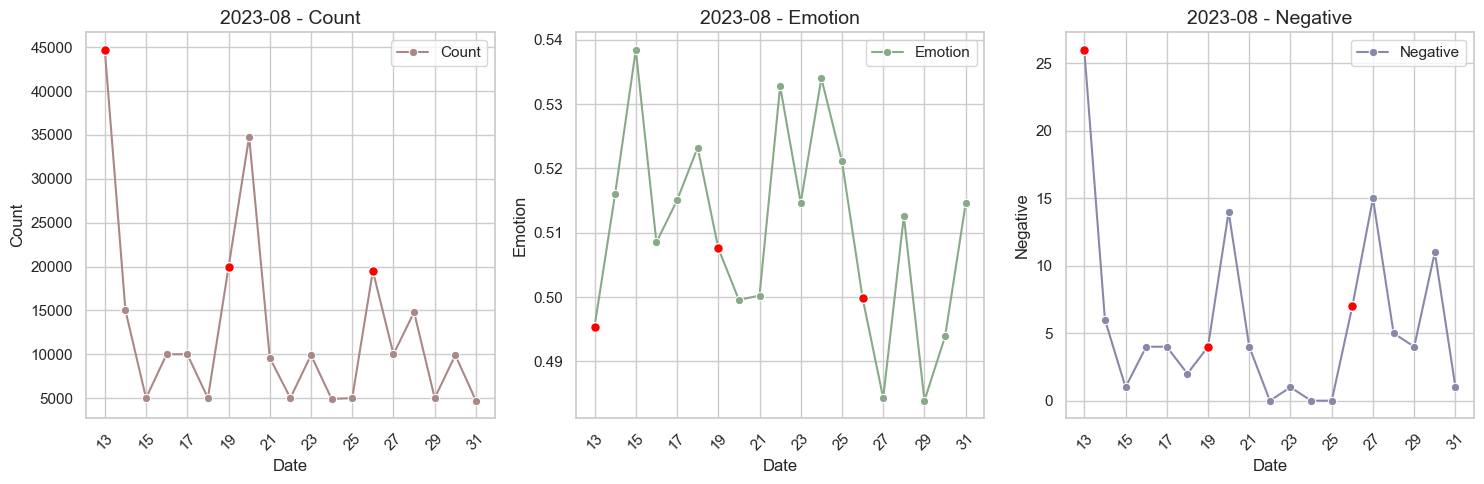

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
24,Brentford (A)2-2,2023-08-13,AML,75,-,-,-,-,2,88.2,-,6.11
23,Manchester United (H)2-0,2023-08-19,AML,90,-,-,-,-,1,78.9,-,7.73
22,Bournemouth (A)0-2,2023-08-26,AML,90,-,-,-,-,2,84.6,-,7.34


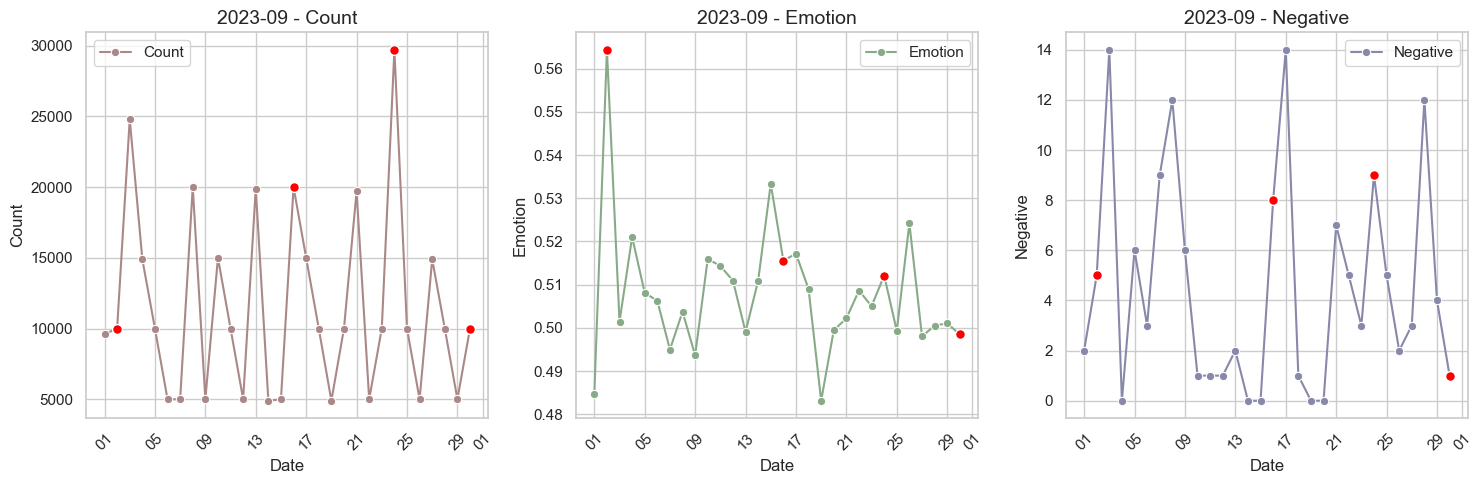

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
21,Burnley (A)2-5,2023-09-02,FW,72,3,-,-,-,5,82.4,-,9.61
20,Sheffield United (H)2-1,2023-09-16,FW,80,-,-,-,-,3,88.9,1,5.98
19,Arsenal (A)2-2,2023-09-24,FW,79,2,-,-,-,3,92.9,-,8.12
18,Liverpool (H)2-1,2023-09-30,FW,69,1,-,-,-,4,81.3,-,7.04


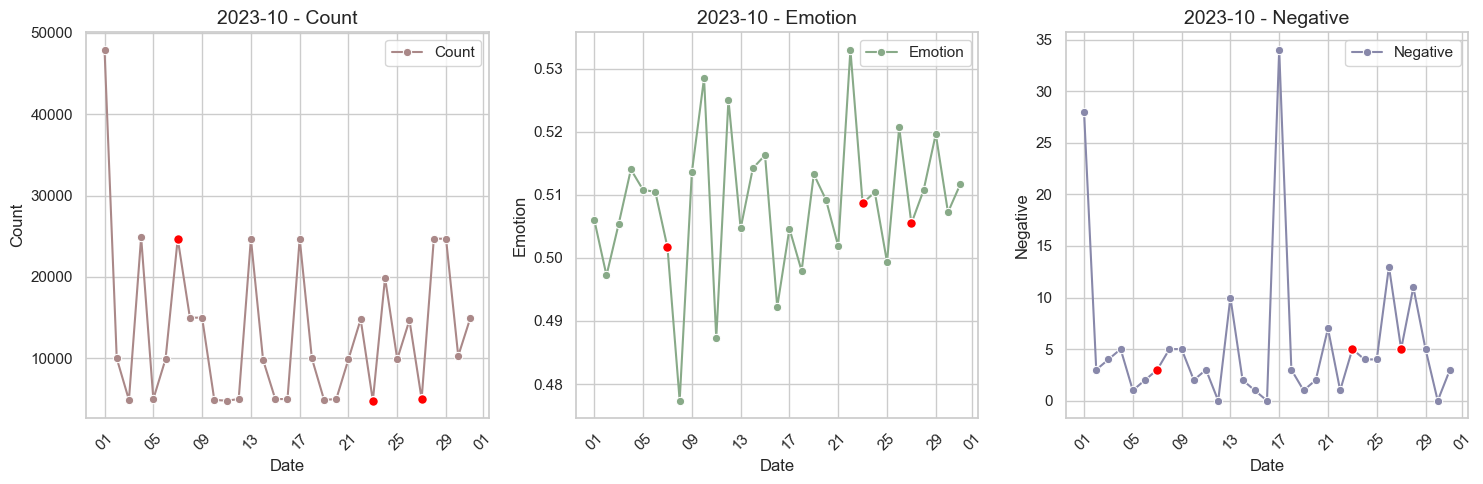

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
17,Luton (A)0-1,2023-10-07,FW,76,-,-,-,-,3,90.0,-,6.82
16,Fulham (H)2-0,2023-10-23,FW,82,1,1,-,-,3,83.3,-,8.91
15,Crystal Palace (A)1-2,2023-10-27,FW,90,1,-,-,-,2,85.0,-,7.31


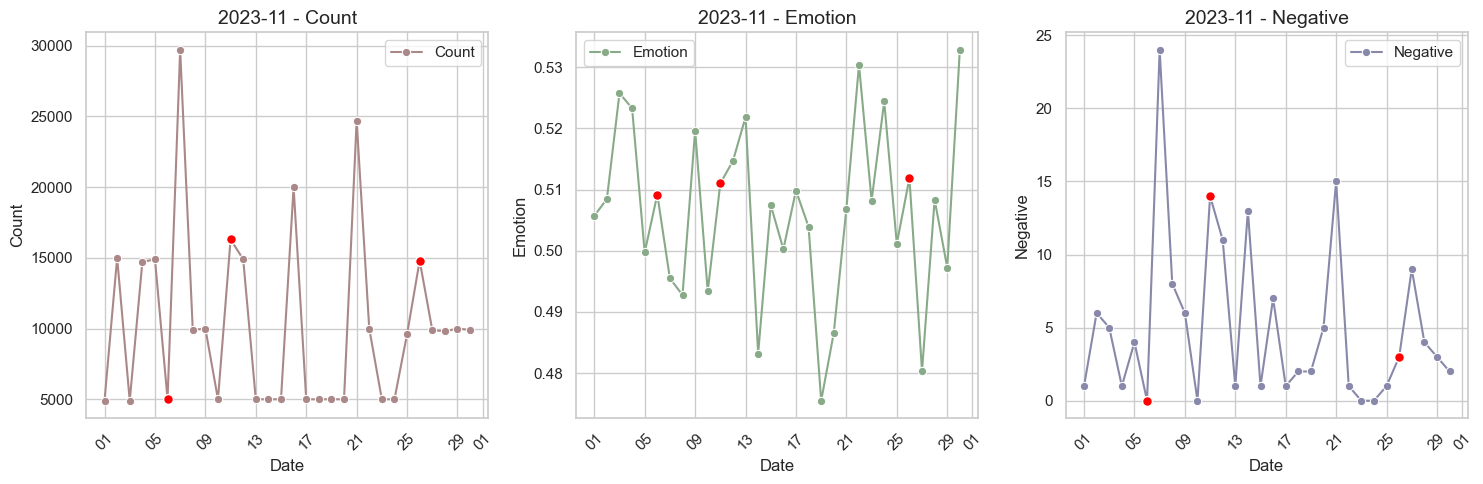

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
14,Chelsea (H)1-4,2023-11-06,FW,90,-,-,-,-,2,85.7,-,6.42
13,Wolves (A)2-1,2023-11-11,FW,90,-,-,-,-,1,80.0,1,6.28
12,Aston Villa (H)1-2,2023-11-26,FW,90,-,-,-,-,2,88.0,-,6.71


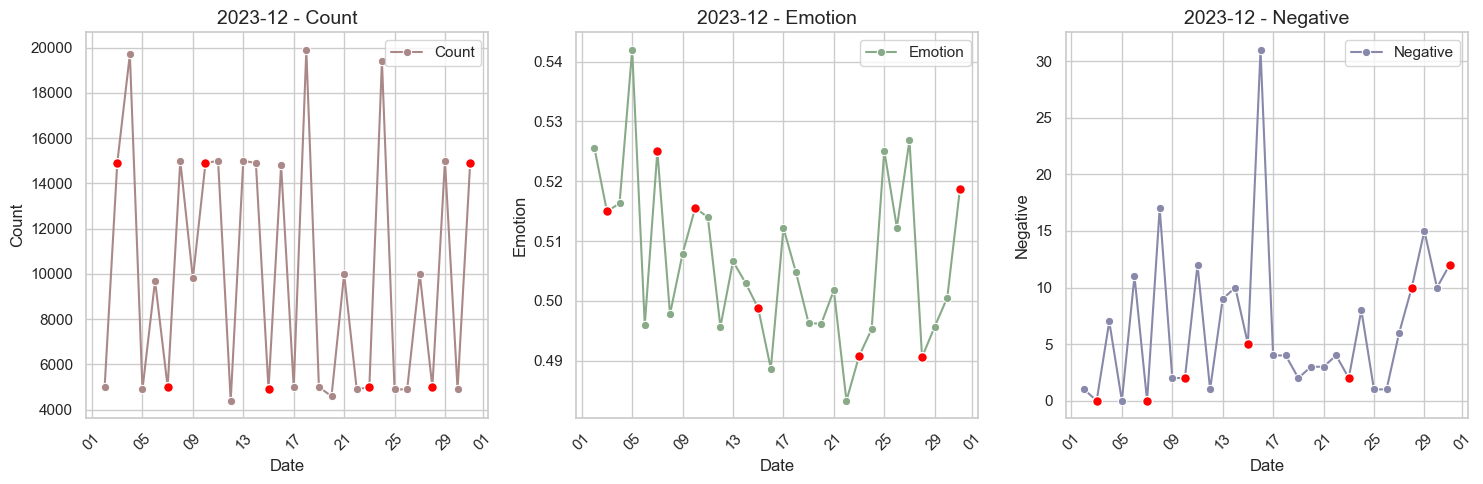

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
11,Manchester City (A)3-3,2023-12-03,FW,90,1,1,-,-,1,85.0,1,7.51
10,West Ham (H)1-2,2023-12-07,FW,88,-,-,-,-,1,78.6,-,7.00
9,Newcastle (H)4-1,2023-12-10,AML,90,1,2,-,-,4,80.6,-,9.50
8,Nottingham Forest (A)0-2,2023-12-15,AML,88,-,-,1,-,4,83.3,-,7.02
7,Everton (H)2-1,2023-12-23,AML,90,1,-,-,-,2,70.6,-,7.57
6,Brighton (A)4-2,2023-12-28,AML,90,-,1,-,-,5,81.3,-,6.80
5,Bournemouth (H)3-1,2023-12-31,AML,90,1,-,-,-,2,97.1,-,8.16


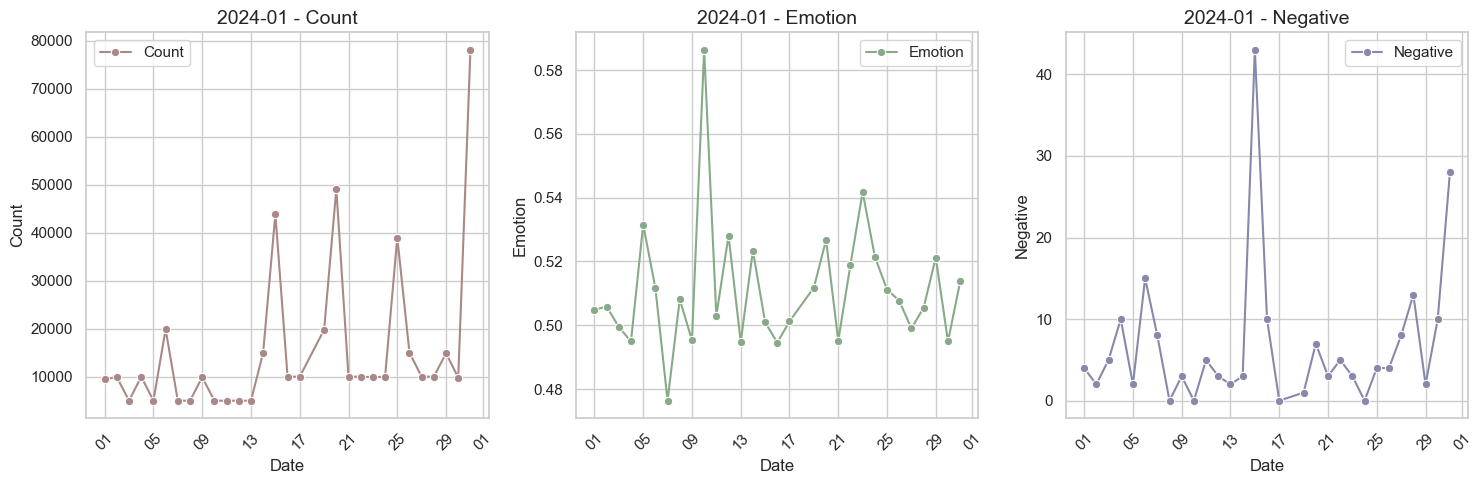

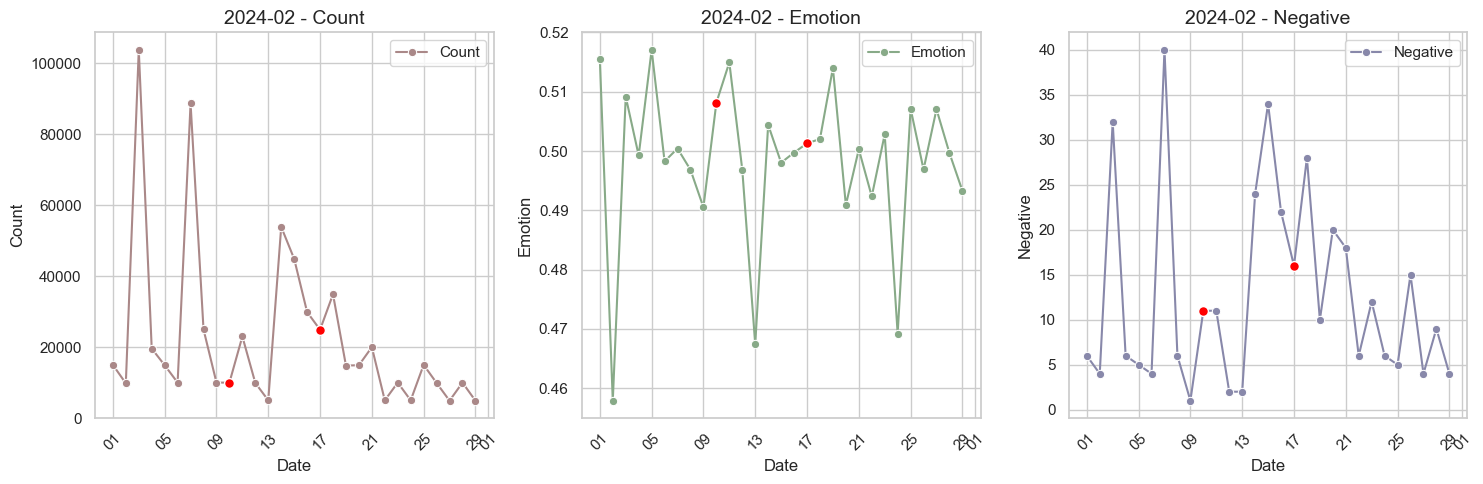

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
4,Brighton (H)2-1,2024-02-10,Sub,28,-,1,-,-,-,91.7,-,6.77
3,Wolves (H)1-2,2024-02-17,AML,90,-,-,-,-,-,81.3,-,6.04


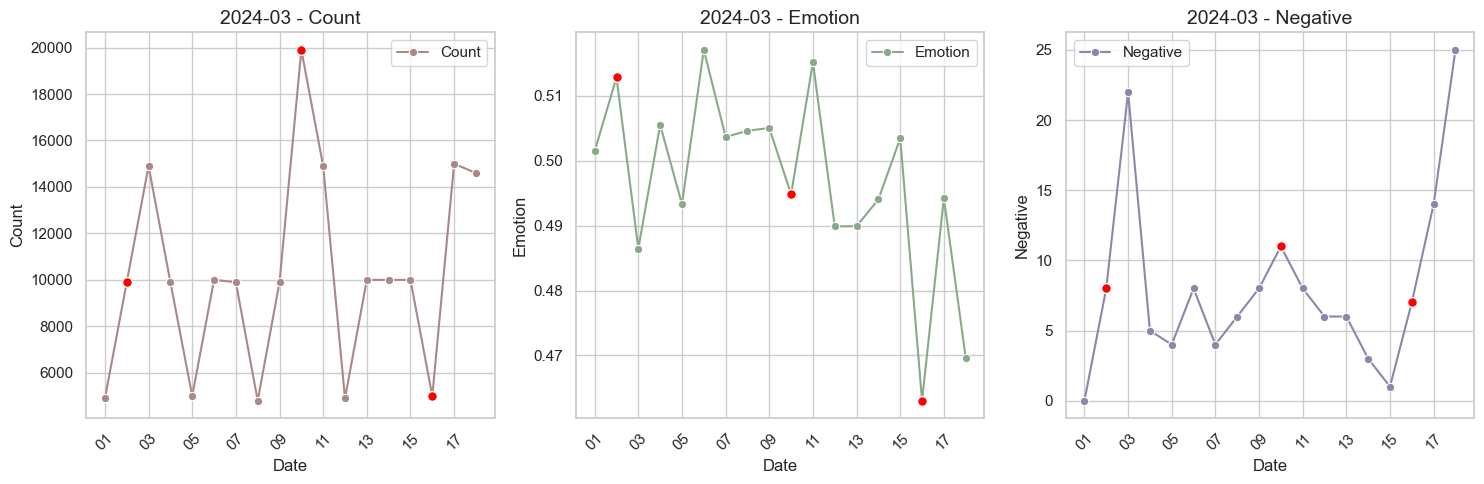

,Opponent,Date,Position,Mins,Goals,Assists,Yel,Red,Shots,PS%,AerialsWon,Rating
2,Crystal Palace (H)3-1,2024-03-02,FW,90,1,-,-,-,5,73.9,-,8.34
1,Aston Villa (A)0-4,2024-03-10,FW,90,1,2,-,-,2,86.0,-,9.35
0,Fulham (A)3-0,2024-03-16,FW,87,-,-,-,-,2,90.6,-,6.49


In [8]:
import seaborn as sns

# Seaborn 스타일 설정으로 전반적인 그래프 디자인 개선
sns.set(style="whitegrid")

def graph_show_all_improved(month, factors):
    month_data = df_emotion[df_emotion['YearMonth'] == month]

    fig, axs = plt.subplots(1, len(factors), figsize=(15, 5))  # 그래프 크기 조정
    
    colors = ['#AA8888', '#88AA88', '#8888AA']
    for i, values in enumerate(zip(factors, colors)):
        factor, color = values
        sns.lineplot(ax=axs[i], x=month_data['DATE'], y=month_data[factor], marker='o', linestyle='-', color=color, label=factor)
        
        for specific_date in match_days:
            if pd.to_datetime(specific_date) in month_data['DATE'].values:
                highlight_data = month_data[month_data['DATE'] == pd.to_datetime(specific_date)]
                axs[i].scatter(highlight_data['DATE'], highlight_data[factor], color='red', s=50, edgecolor='white', zorder=5)
                
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
        axs[i].set_title(f'{month} - {factor}', fontsize=14)
        axs[i].set_xlabel('Date', fontsize=12)
        axs[i].set_ylabel(factor, fontsize=12)
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# 예시 실행
df_emotion['DATE'] = pd.to_datetime(df_emotion['DATE'])
df_emotion['YearMonth'] = df_emotion['DATE'].dt.to_period('M')
unique_months = df_emotion['YearMonth'].unique()

df_stats['Date'] = pd.to_datetime(df_stats['Date'])
df_stats['YearMonth'] = df_stats['Date'].dt.to_period('M')

for month in unique_months:
    graph_show_all_improved(month, ['Count', 'Emotion', 'Negative'])
    month_data_stats = df_stats[df_stats['YearMonth'] == month]
    if not month_data_stats.empty:
        display(month_data_stats[['Opponent', 'Date', 'Position', 'Mins', 'Goals', 'Assists', 'Yel', 'Red', 'Shots', 'PS%', 'AerialsWon', 'Rating']].sort_values(by='Date'))


In [9]:

# Filter the stats and emotion data for the specific month
# Set of specific dates we want to highlight
df_emotion['DATE'] = pd.to_datetime(df_emotion['DATE'])
df_emotion['YearMonth'] = df_emotion['DATE'].dt.to_period('M')
unique_months = df_emotion['YearMonth'].unique()

df_stats['Date'] = pd.to_datetime(df_stats['Date'])
df_stats['YearMonth'] = df_stats['Date'].dt.to_period('M')

def graph_show_all(month, factors):
    month_data = df_emotion[df_emotion['YearMonth'] == month]

    # factors는 그래프로 표시할 컬럼들의 리스트입니다.
    fig, axs = plt.subplots(1, len(factors), figsize=(9, 3))  # 3개의 그래프를 한 줄에 배열
    
    for i, factor in enumerate(factors):
        axs[i].plot(month_data['DATE'], month_data[factor], marker='o', linestyle='-', color='blue', label=factor)
        
        for specific_date in match_days:
            if pd.to_datetime(specific_date) in month_data['DATE'].values:
                highlight_data = month_data[month_data['DATE'] == pd.to_datetime(specific_date)]
                axs[i].scatter(highlight_data['DATE'], highlight_data[factor], color='red', zorder=5)
                
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d'))
        axs[i].set_title(f'{month} - {factor}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(factor)
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].grid(True)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# 가정된 df, df_stats, match_days 데이터로 작동하는 예시
# 실제 사용시에는 df, df_stats, unique_months, match_days를 정의해야 합니다.

for month in unique_months:
    break
    graph_show_all(month, ['Count', 'Emotion', 'Negative'])
    # month_data_stats 관련 처리는 여기에 포함되지 않았습니다.
    month_data_stats = df_stats[df_stats['YearMonth'] == month]
    if not month_data_stats.empty:
        display(month_data_stats[['Opponent', 'Date', 'Position', 'Mins', 'Goals', 'Assists', 'Yel', 'Red', 'Shots', 'PS%', 'AerialsWon', 'Rating']].sort_values(by='Date'))


In [10]:
import json
import pandas as pd

def reading_file(file_path):
    """
    CSV 파일 리딩 -> DataFrame으로 변환

    Parameters:
    - value: 날짜를 나타내는 String변수
    
    Returns:
    - 변환된 String 날찌 변수 (YYYY-MM 형식)
    """

    # 시도할 인코딩 목록
    encodings = ['utf-8', 'cp949', 'ISO-8859-1', 'cp1252']  
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            return df  # 데이터프레임 반환 또는 데이터프레임 처리
        except Exception as e:
            pass
    return None

def convert_date(date_str):
    # 한국식 스타일로 변환
    dd, mm, yyyy = date_str.split('-')
    return f'{yyyy}-{mm}-{dd}'

def conver_date_int(date_int):
    d = f'{date_int}'
    return f'{d[:4:]}-{d[4:6:]}-{d[6::]}'



df = reading_file('dcinside.csv')

json_box = {}

for i in range(len(df)):
    id = f"{i+1}"
    json_box[id] = [int(df['DATE'][i]), df['CONTENT'][i]]


# with open('example.json', 'w', encoding='utf-8') as f: json.dump(json_box, f)

with open('data_post.json','r', encoding='utf-8') as f:
    json_data_post = json.load(f)
    
    for id in json_data_post:
        print(id)
        break

TypeError: object of type 'NoneType' has no len()